## scipyによる確率分布と特殊関数

基本的な特殊関数としてベータ関数、ガンマ関数などを取り上げ、scipyでの利用方法をメモしておきます。

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/scipy/func/func_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/scipy/func/func_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G95


In [2]:
!python -V

Python 3.5.5 :: Anaconda, Inc.


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 2.2.2
scipy version : 1.4.1
numpy version : 1.18.1


## ベータ関数

$$
B(\alpha, \beta) = \int_0^1x^{\alpha -1 } (1-x)^{\beta -1} dx
$$

一般的なベータ関数は$\alpha, \beta$は複素数まで拡張されますが、データ分析などのでは1より大きい整数を取るのが一般的です。学生時代が懐かしいです。第一種オイラー積分とも言います。ベータ関数はベータ分布

$$
p(x| \alpha, \beta) = \frac{x^{\alpha -1 } (1-x)^{\beta -1} }{B(\alpha, \beta)}
$$

を考えるときに利用されます。

sicpyでのベータ関数の値を取得する方法をメモしておきます。

In [4]:
from scipy.special import beta

# \alpha = 2, \beta = 2
print('beta(2,2) = {:.4f}'.format(beta(2,2)))

# \alpha = 3, \beta = 4
print('beta(3,4) = {:.4f}'.format(beta(3,4)))

# \alpha = 5, \beta = 2
print('beta(5,2) = {:.4f}'.format(beta(5,2)))

beta(2,2) = 0.1667
beta(3,4) = 0.0167
beta(5,2) = 0.0333


## ガンマ関数

$$
\Gamma(x) = \int_0^\infty t^{x-1}e^{-x} dx
$$

で定義され、よく言われるように階乗の一般化です。第二種オイラー積分とも言われます。

$x$が正の整数の場合、

$$
\Gamma(x) = (x-1)!
$$

となります。また、以下の性質があります。しつこいですが、懐かしいですね。

- $ \displaystyle \Gamma(x+1) = x\Gamma(x)$
- $ \displaystyle
\Gamma\left(\frac{1}{2}\right) = \sqrt{\pi}
$

ガンマ分布は至る所で利用されますが、名前つながりで言うと、ガンマ分布です。

$$
P(x) = \frac{\lambda^k x^{k-1}e^{-\lambda x}}{\Gamma(k)}
$$

ガンマ分布の詳細は[こちら](/article/library/scipy/dist/#heading37)に記載しました。

## ロジット関数

このオッズという言葉は競馬でよく聞くオッズと同じなんでしょうか。競馬はやらないのでわかりませんね。誰か教えてください。とりあえず、ある事象が起こる確率が$p$であるとき、$$\frac{p}{1-p}$$をオッズと言うそうです。その対数を$$\log p - \log(1-p)$$を対数オッズと言います。

$$
f(p) = \log \frac{p}{1-p}
$$
をロジット関数と言います。

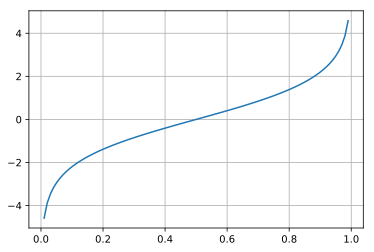

In [5]:
from scipy.special import logit

x = np.linspace(0,1,100)
y = logit(x)

plt.grid()
plt.plot(x,y)
plt.show()

## ロジスティック関数 

一般に、$$ f(x)= \frac{a}{1+e^{-k(x-x_0)}}$$をロジスティック関数と言います。ここで$a = k = 1, x_0 = 0$をシグモイド関数と言います。S字カーブというやつですね。ロジスティック関数よりも、シグモイド関数（その多変数版であるも良く出てきます。

## シグモイド関数

シグモイド関数は以下の通りです。$$ f(x)= \frac{1}{1+e^{-x}}$$

グラフは以下の通りです。綺麗なS字カーブになっています。

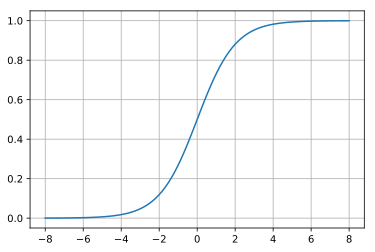

In [6]:
from scipy.special import expit

x = np.linspace(-8,8,100)
y = expit(x)

plt.grid()
plt.plot(x,y)
plt.show()